Data Story Telling: What do we want to know?
1. Can we count something interesting?
2. Can we find some trends?
3. Can you make a bar plot or histogram?
4. Can you compare two related quantities?
5. Can you make a scatterplot?
6. Can you make a time-series plot?

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%cd C:\Users\Shing Han\Documents\Springboard\capstone 2
listings = pd.read_csv('listings.csv')
print(listings.shape)
listings.transpose()
listings['price'] = listings.price.str.replace("\$|,",'').astype(float)
#Clean Data: we want to remove all non numeric values for the time being
listings = listings.select_dtypes(include=[np.number])
listings.transpose()
drop_list = ['id','scrape_id','host_id',
             'thumbnail_url','medium_url','xl_picture_url',
             'host_acceptance_rate','neighbourhood_group_cleansed','square_feet']
listings = listings.drop(drop_list, axis=1)
cols = ['accommodates','bathrooms','bedrooms','number_of_reviews','review_scores_value','guests_included','price','host_listings_count']
listings = listings.replace(np.NaN, 0)
listings.transpose()

C:\Users\Shing Han\Documents\Springboard\capstone 2
(4804, 96)


,0,1,2,3,4,5,6,7,8,9,...,4794,4795,4796,4797,4798,4799,4800,4801,4802,4803
host_listings_count,1.000000,2.000000,10.000000,4.000000,10.000000,2.000000,1.000000,2.000000,1.000000,1.000000,...,6.000000,1.000000,0.000000,2.000000,1.000000,3.000000,6.000000,6.000000,6.000000,2.000000
host_total_listings_count,1.000000,2.000000,10.000000,4.000000,10.000000,2.000000,1.000000,2.000000,1.000000,1.000000,...,6.000000,1.000000,0.000000,2.000000,1.000000,3.000000,6.000000,6.000000,6.000000,2.000000
latitude,37.769310,37.745112,37.766690,37.730746,37.764872,37.775249,37.784707,37.759189,37.751740,37.762589,...,37.708136,37.769634,37.776659,37.769634,37.758831,37.769069,37.708212,37.708333,37.708689,37.786076
longitude,-122.433856,-122.421018,-122.452505,-122.448409,-122.451828,-122.436374,-122.445554,-122.422367,-122.409421,-122.405431,...,-122.454806,-122.432961,-122.416178,-122.422197,-122.402456,-122.422581,-122.455345,-122.456090,-122.456545,-122.404777
accommodates,3.000000,5.000000,2.000000,1.000000,2.000000,5.000000,7.000000,3.000000,4.000000,2.000000,...,2.000000,4.000000,6.000000,1.000000,3.000000,6.000000,4.000000,3.000000,2.000000,1.000000
bathrooms,1.000000,1.000000,4.000000,2.000000,4.000000,1.500000,1.000000,1.000000,2.500000,1.000000,...,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,0.500000
bedrooms,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
beds,2.000000,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,3.000000,1.000000,...,1.000000,2.000000,2.000000,1.000000,1.000000,3.000000,2.000000,2.000000,1.000000,1.000000
price,170.000000,235.000000,65.000000,60.000000,65.000000,575.000000,255.000000,139.000000,285.000000,135.000000,...,50.000000,120.000000,200.000000,62.000000,210.000000,250.000000,82.000000,75.000000,63.000000,10.000000
guests_included,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,3.000000,1.000000,...,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,4.000000,3.000000,2.000000,1.000000


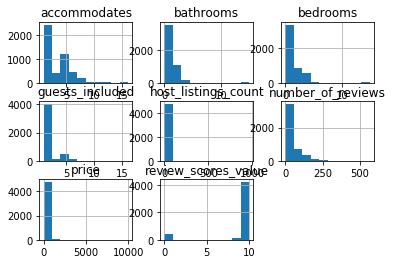

In [24]:
#Histograms
listings[cols].hist()
plt.show()

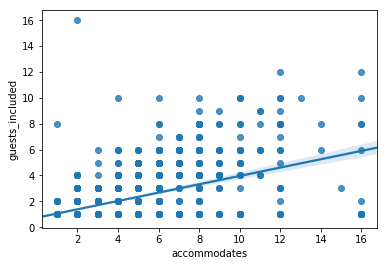

In [25]:
#Scatterplots
sns.regplot(x=listings['accommodates'],y=listings['guests_included'])

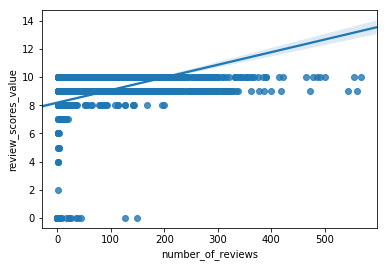

In [26]:
sns.regplot(x=listings['number_of_reviews'],y=listings['review_scores_value'])

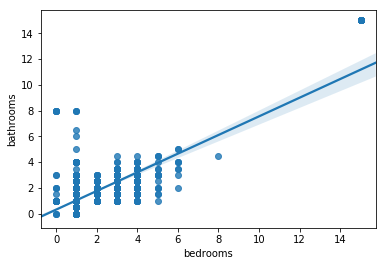

In [27]:
sns.regplot(x=listings['bedrooms'],y=listings['bathrooms'])

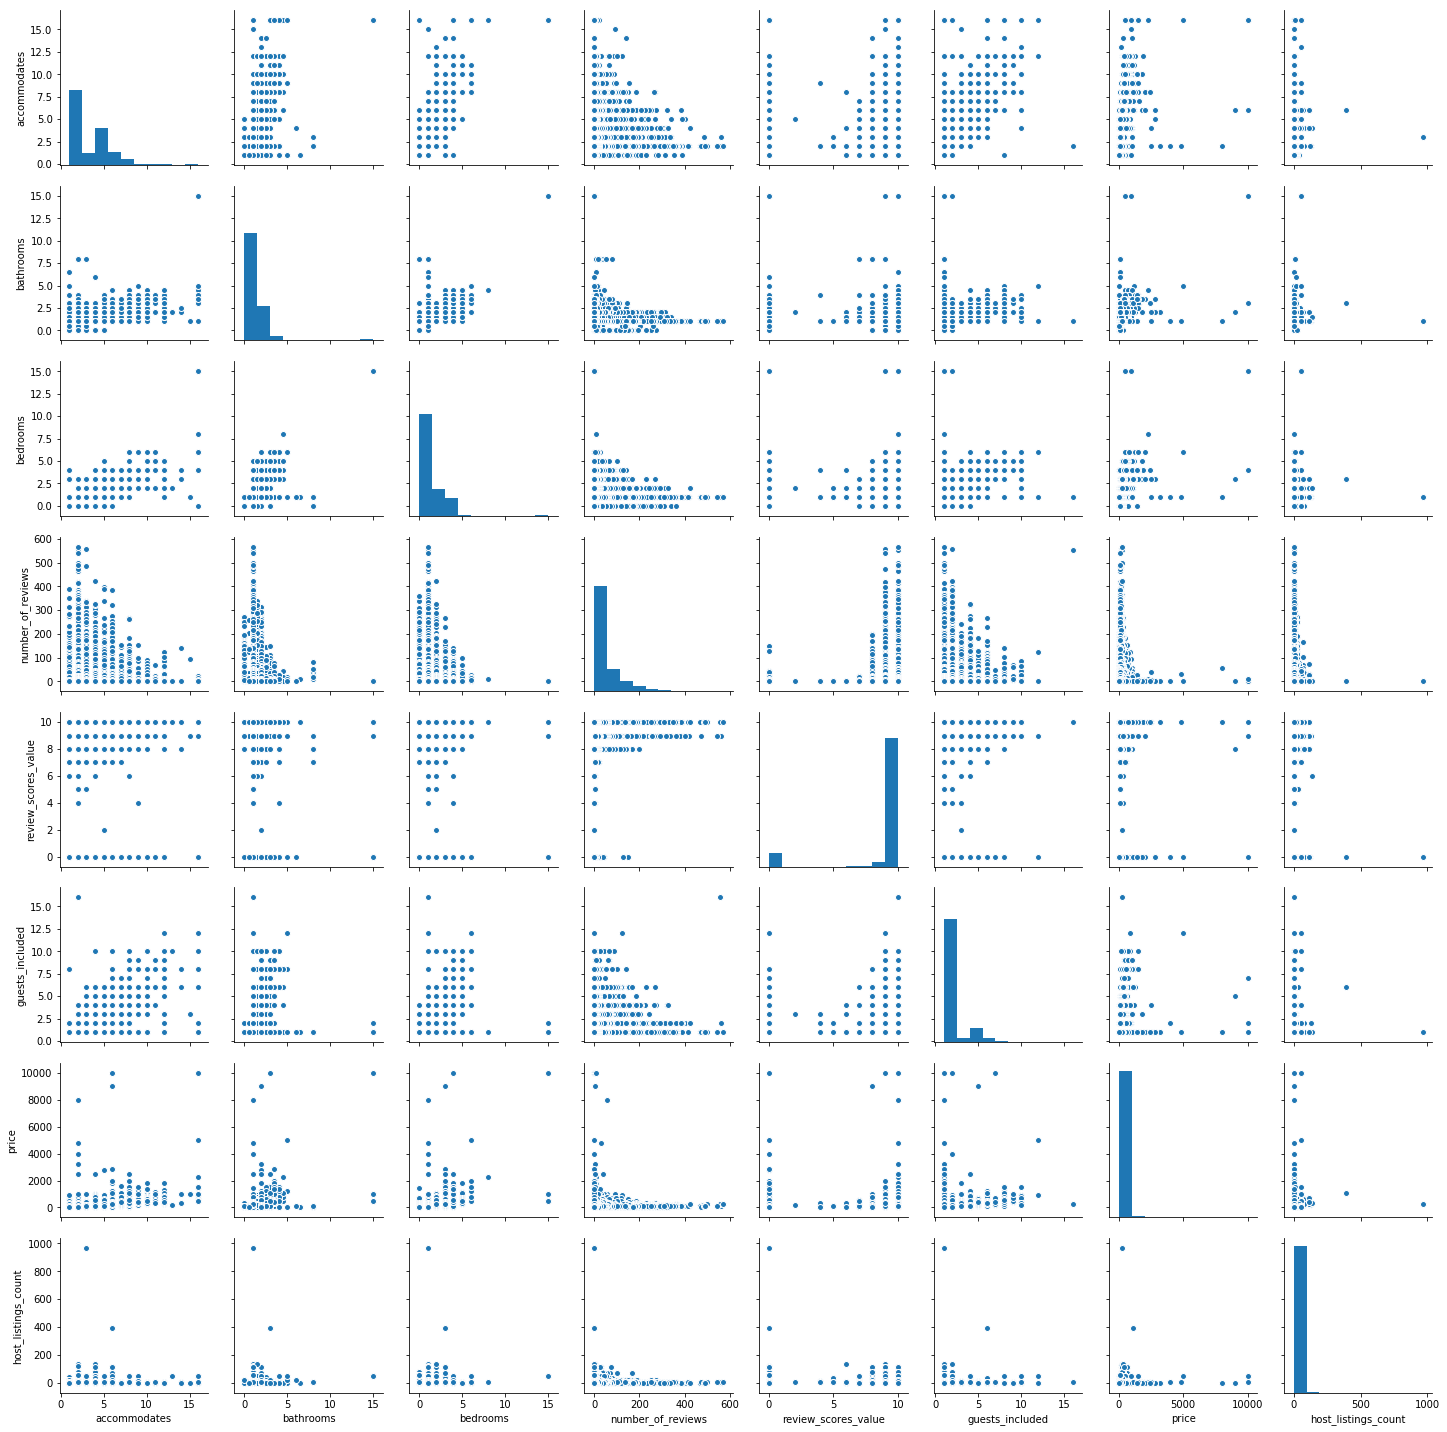

In [28]:
#Pairwise Plot
sns.pairplot(listings[cols])

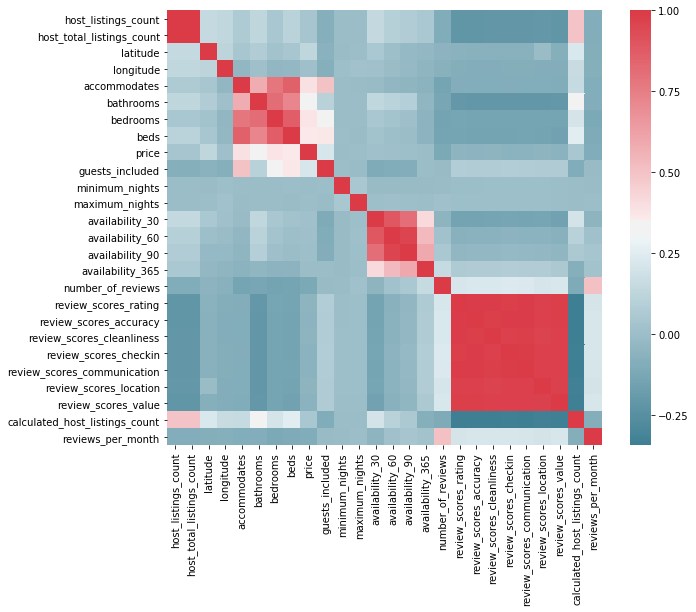

In [29]:
#Heatmap
f, ax = plt.subplots(figsize=(10,8))
corr = listings.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),cmap=sns.diverging_palette(220,10,as_cmap=True),
           square=True, ax=ax)

1. It's interesting that people either leave a 10 for their reviews or a 0 theres not much in between.
2. There seems to be some strong and weak correlations that will further be explored with our machine learning K-Neighbors algorithm.
3. Bar Plots and Histograms are shown above
4. The two quantities I am comparing are bedrooms and bathrooms which display multi-collinearity. This makes sense because the number of bathrooms and bedrooms are dependant upon eachother.
5. Multiple scatter plots are shown above.
6. There is no Time-series for this data.